# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o pi� blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np 
imageFull= Image.open('figure1.jpg')
 
#Leggo l'immagine

image = rgb2gray(imageFull)

maxv, minv = np.max(image), np.min(image)

image = (image - minv)/(maxv-minv)

In [ ]:
fig = plt.figure(figsize=(20, 20))
#plot dell'immagine in 6 ottave 
#sigma aumenta all'aumentare di i 
#la dimensione del filtro aumenta di 2*3*sigma+1
#per ogni nuovo sigma calcolato applica all'immagine originale il filtro gaussiano
num_octave = 6

for i in range(num_octave):
    sigma = 2**(i-1)
    fig.add_subplot(1, num_octave, i+1) 
    plt.imshow(ndimage.gaussian_filter(image,sigma),cmap=cm.gray)
    s = 2*np.ceil(3*sigma)+1
    plt.title(f'$\sigma$: {sigma} (filter size: {s})')
    plt.axis('off')

plt.show()

In [ ]:
#calcola e mostra la piramide gaussiana
rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    sigma = 2**i
    cur_scale = ndimage.gaussian_filter(image,sigma)
    cur_scale = cur_scale[::2**(i+1),::2**(i+1)]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap=cm.gray)
plt.axis('off')
plt.show()

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cio� calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {b^2 + \exp(a^2) * \sin (c*d)} {3e + 1}
$

*non sono necessarie librerie esterne*

In [ ]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)



# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [70]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

In [71]:
#PER INDIVIDUARE I CAMBIAMENDI APPORTATI APPLICO IL MODELLO E STAMPO LA SHAPE 
x = torch.rand(1,3,400,400)
output=model(x)
output.shape

torch.Size([1, 30, 66, 50])

Si può notare come il tensore in input sia stato modificato restituendo 30 canali in output e un tensore con shape ridotta a 66x50

Indicare giustificando la risposta qual'� il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

# Esercizio 5

Adattare/semplificare la rete AlexNet affinch� gestisca un input di immagini 400x400

Nel metodo test si ridimensiona l'immagine in input per far in modo tale che la sua shape sia compatibile all'input che caratterizza la AlexNet

In [68]:
class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super().__init__()

#AGGIUNTA DI UN LIVELLO INIZIALE CHE RENDA COMPATIBILE LA DIMENSIONE DELL'INPUT CON QUELLA DELL'INPUT DELLA RETE

        self.layer0 = nn.Sequential(
            
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=11, stride=2),
           
            nn.ReLU(inplace=True),
            
        )
        #Segue la architettura standard della AlexNet
        self.layer1 = nn.Sequential(
            
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
           
            nn.ReLU(inplace=True),
            
           
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, groups=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, padding=1, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(in_features=6*6*256, out_features=4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout()
        )
        self.layer7 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        
        self.layer8 = nn.Linear(in_features=4096, out_features=num_classes)
        
    def forward(self, x):
        x = self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(x)))))
        
        print(x.size())
        x = x.view(-1, 6*6*256)
        x = self.layer8(self.layer7(self.layer6(x)))
        
        return x

# Esercizio 6

Data la seguente immagine, costruire due Bounding box con IoU = 0.5. 
Descrivere tutte le operazioni effettuate

![](figure2.jpg)

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np 
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import torch.nn as nn
import torchvision.transforms as transforms
imageFull= Image.open('figure2.jpg')

In [14]:
%matplotlib inline

pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

In [15]:
image = pil2tensor(imageFull)

# fake batch dimension => shape is (1, 3, 800, 800)
image4D = image.unsqueeze(0)

Shape del tensore: torch.Size([3, 427, 640])


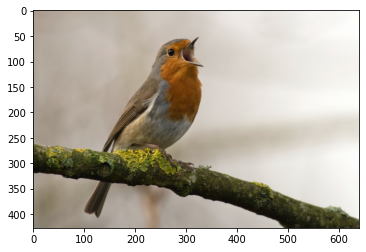

In [16]:
def plot_image(tensor):
    plt.figure()
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

print(f'Shape del tensore: {image.shape}')    
plot_image(image)

In [ ]:
pos_iou_threshold = 0.5
neg_iou_threshold = 0.5

bbox_labels[max_ious < neg_iou_threshold] = 0
bbox_labels[gt_argmax_ious] = 1
bbox_labels[max_ious >= pos_iou_threshold] = 1

pos_ratio = 0.5
n_sample = 256
n_pos = pos_ratio * n_sample

pos_index = np.where(bbox_labels == 1)[0]

if len(pos_index) > n_pos:
    disable_index = np.random.choice(pos_index, size=(len(pos_index) - n_pos), replace=False)
    bbox_labels[disable_index] = -1

# negative    
n_neg = n_sample - np.sum(bbox_labels == 1)
neg_index = np.where(bbox_labels == 0)[0]

if len(neg_index) > n_neg:
    disable_index = np.random.choice(neg_index, size=(len(neg_index) - n_neg), replace=False)
    bbox_labels[disable_index] = -1